In [3]:
import tensorflow as tf


In [4]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [5]:
print("x_train_Shape", x_train.shape)
print("y_train_Shape", y_train.shape)
print("x_test_Shape", x_test.shape)
print("y_train_Shape", y_test.shape)

x_train_Shape (60000, 28, 28)
y_train_Shape (60000,)
x_test_Shape (10000, 28, 28)
y_train_Shape (10000,)


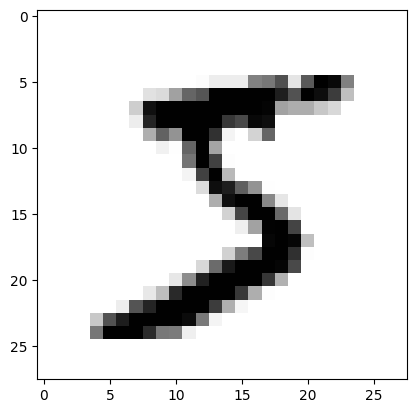

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline 
#ensures images are set op within the notebook

plt.imshow(x_train[0], cmap =  'binary')
plt.show()

In [19]:
y_train[0]


5

In [8]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [9]:
#one-hot-encoding
from tensorflow.keras.utils import to_categorical

y_train_encode = to_categorical(y_train)
y_test_encode = to_categorical(y_test)

In [10]:
print("y_train_Shape", y_train_encode.shape)
print("y_test_Shape", y_test_encode.shape)

y_train_Shape (60000, 10)
y_test_Shape (10000, 10)


In [11]:
y_train_encode[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
import numpy as np
x_train_reshape = np.reshape(x_train, (60000, 784))
x_test_reshape = np.reshape(x_test, (10000, 784))

x_train_reshape.shape

(60000, 784)

In [20]:
print(set(x_train_reshape[1]))

{0, 6, 7, 10, 12, 19, 21, 25, 28, 29, 37, 38, 47, 48, 50, 51, 54, 56, 57, 60, 63, 71, 75, 76, 79, 84, 85, 86, 96, 112, 114, 121, 122, 128, 130, 131, 135, 141, 145, 146, 148, 159, 162, 163, 165, 167, 168, 173, 178, 179, 186, 189, 190, 195, 196, 198, 199, 202, 208, 215, 223, 224, 225, 227, 228, 229, 230, 233, 237, 238, 239, 240, 243, 246, 249, 252, 253, 255}


In [21]:
x_mean = np.mean(x_train_reshape)
x_std = np.std(x_train_reshape)

epsilon = 1e-10
x_train_norm = (x_train_reshape - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshape - x_mean)/(x_std + epsilon)

In [22]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

In [23]:
#creating the neural network
from tensorflow.keras.models import Sequential #creates single ip-op stacked up layers
from tensorflow.keras.layers import Dense #contains all the neurons deeply connected witin themselves

model = Sequential([
    Dense(128, activation = 'relu', input_shape=(784,)),
    Dense(128, activation = 'relu'), #sets 1 or 0 as op of hidden layer if ans is +ve or -ve
    Dense(10, activation = 'softmax') # gives probablities of outputs that sum up to 1, helps determine max probablity for class identification
])

In [24]:
model.compile(
optimizer = 'sgd', #stociastic gradient descent
loss = 'categorical_crossentropy', #diff bet acual and predicted, the loss func must be minimised by the otimizer
metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(x_train_norm, y_train_encode, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3746 - accuracy: 0.8900
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1864 - accuracy: 0.9458
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1402 - accuracy: 0.9592


In [26]:
preds = model.predict(x_test_norm)
preds.shape

313/313 [==============================] - 1s 1ms/step


(10000, 10)

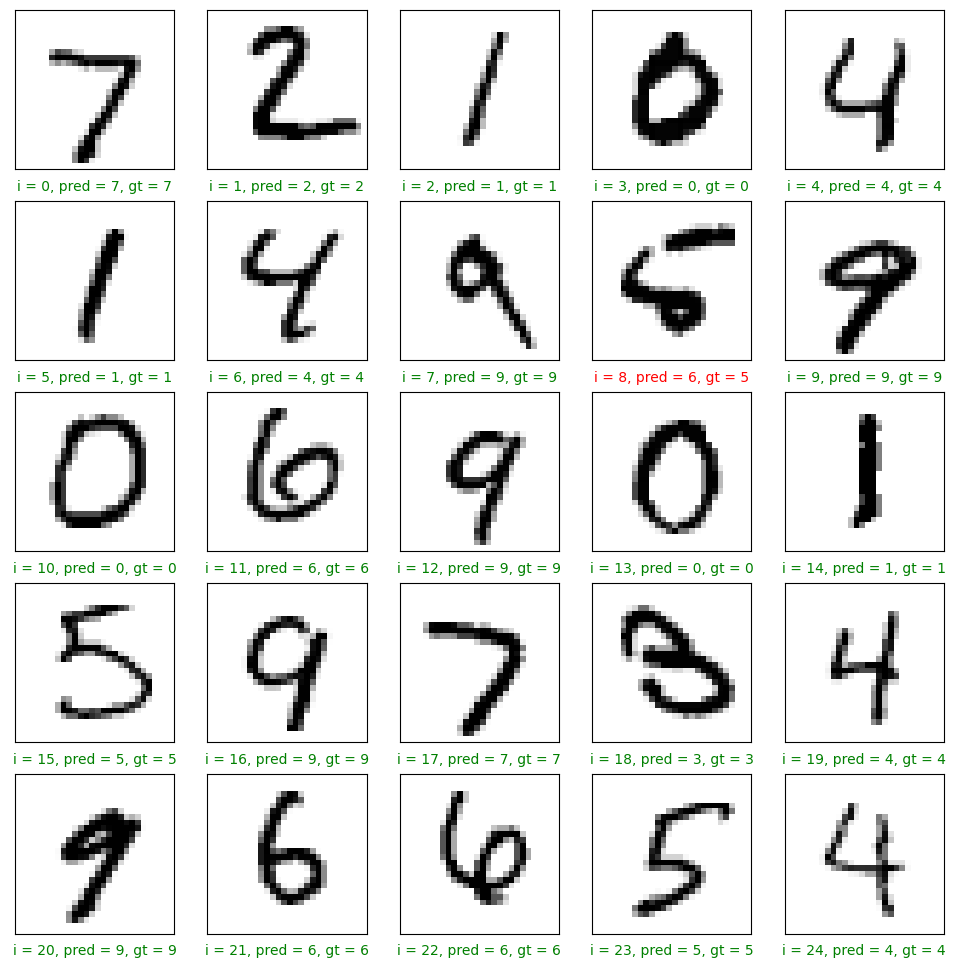

In [27]:
plt.figure(figsize = (12,12))
start_ind = 0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_ind +i])
    gt = y_test[start_ind+i]
    col = 'g'
    if pred != gt:
        col = 'r'
    
    plt.xlabel('i = {}, pred = {}, gt = {}'.format(start_ind+i, pred, gt), color = col)
    plt.imshow(x_test[start_ind +i], cmap = 'binary')
plt.show()

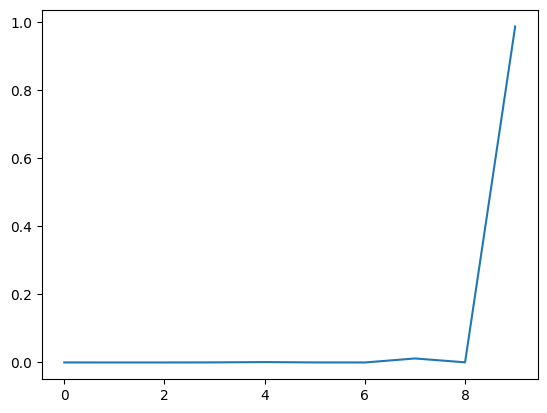

In [29]:
plt.plot(preds[20])
plt.show()